In [1]:
# Load libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

os.getcwd()

'C:\\Users\\David Olivero\\AnacondaProjects\\Loans-In-Colorado'

In [2]:
filename = 'LIC_Model_Input.csv'

df = pd.read_csv(filename)

df.head().T

,0,1,2,3,4
ApprovalFY,2006,1997,1997,2005,1997
Term,264,60,120,35,60
NoEmp,9,2,4,3,2
NewBiz,0,0,0,0,0
RevLineCr,0,0,0,0,0
LowDoc,0,1,0,0,1
DisbursementGross,1.5242e+06,90000,59000,50000,21200
MIS_Status,P I F,P I F,P I F,CHGOFF,P I F
TotalLoansInCounty,445,445,445,445,445
PIF_RateByCounty,0.876404,0.876404,0.876404,0.876404,0.876404


This time, instead of dropping the Industry column, I'd like to one-hot encode it. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19298 entries, 0 to 19297
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ApprovalFY          19298 non-null  int64  
 1   Term                19298 non-null  int64  
 2   NoEmp               19298 non-null  int64  
 3   NewBiz              19298 non-null  float64
 4   RevLineCr           19183 non-null  float64
 5   LowDoc              19242 non-null  float64
 6   DisbursementGross   19298 non-null  float64
 7   MIS_Status          19293 non-null  object 
 8   TotalLoansInCounty  19298 non-null  int64  
 9   PIF_RateByCounty    19298 non-null  float64
 10  MedIncome           19298 non-null  int64  
 11  PopChange           19298 non-null  float64
 12  EmployedInCty       19298 non-null  int64  
 13  UnempInCty          19298 non-null  int64  
 14  UnempRateInCty      19298 non-null  float64
 15  DeathsPer100k       18970 non-null  object 
 16  PayD

The MIS_Status column are my labels, so I will encode them with 1's and 0's:

In [4]:
# Replace MIS_Status column with 0's and 1's. 1 corresponds to a loan default. 

df['MIS_Status'] = df.MIS_Status.replace(to_replace=['P I F', 'CHGOFF'], value=[1, 0])

In [5]:
# There appear to be several non-numeric values in the DeathsPer100k column turning it into an object. 
df.DeathsPer100k.describe()

count     18970
unique       59
top       823.4
freq       3635
Name: DeathsPer100k, dtype: object

In [6]:
# Python is treating this column like string objects:
df.DeathsPer100k.value_counts().tail()

1372.6                 4
616.2                  2
1146.6                 1
537.9 (Unreliable)     1
1048.1 (Unreliable)    1
Name: DeathsPer100k, dtype: int64

In [7]:
# The object assignments comes from all the (Unreliable) numbers, so we will force these into numbers:

df['DeathsPer100k'] = pd.to_numeric(df['DeathsPer100k'], errors='coerce')

In [8]:
# There are still several rows with null values for this metric, so I will replace with the mean value of DeathsPer100k:

df['DeathsPer100k'].fillna((df['DeathsPer100k'].mean()), inplace=True)

In [9]:
df.DeathsPer100k.describe()

count    19298.000000
mean       625.524481
std        194.370452
min        160.800000
25%        551.900000
50%        565.800000
75%        823.400000
max       1372.600000
Name: DeathsPer100k, dtype: float64

In [10]:
# To review, a little over 17% of the loans in this dataset are defaulted, as seen below. 
df.MIS_Status.value_counts([0])

1.0    0.825429
0.0    0.174571
Name: MIS_Status, dtype: float64

In [11]:
# We can see we still have some probable nan's in the RevLineCr and PayDelay features:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19298 entries, 0 to 19297
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ApprovalFY          19298 non-null  int64  
 1   Term                19298 non-null  int64  
 2   NoEmp               19298 non-null  int64  
 3   NewBiz              19298 non-null  float64
 4   RevLineCr           19183 non-null  float64
 5   LowDoc              19242 non-null  float64
 6   DisbursementGross   19298 non-null  float64
 7   MIS_Status          19293 non-null  float64
 8   TotalLoansInCounty  19298 non-null  int64  
 9   PIF_RateByCounty    19298 non-null  float64
 10  MedIncome           19298 non-null  int64  
 11  PopChange           19298 non-null  float64
 12  EmployedInCty       19298 non-null  int64  
 13  UnempInCty          19298 non-null  int64  
 14  UnempRateInCty      19298 non-null  float64
 15  DeathsPer100k       19298 non-null  float64
 16  PayD

In [12]:
df['RevLineCr'].fillna((df['RevLineCr'].mean()), inplace=True)
df['PayDelay'].fillna((df['PayDelay'].mean()), inplace=True)

In [13]:
df.shape

(19298, 18)

In [14]:
df = df.dropna()
df.shape

(19237, 18)

In [15]:
# remove industry column:

df1 = df.drop(columns='Industry')
df1.head().T

,0,1,2,3,4
ApprovalFY,2.006000e+03,1997.000000,1997.000000,2005.000000,1997.000000
Term,2.640000e+02,60.000000,120.000000,35.000000,60.000000
NoEmp,9.000000e+00,2.000000,4.000000,3.000000,2.000000
NewBiz,0.000000e+00,0.000000,0.000000,0.000000,0.000000
RevLineCr,0.000000e+00,0.000000,0.000000,0.000000,0.000000
LowDoc,0.000000e+00,1.000000,0.000000,0.000000,1.000000
DisbursementGross,1.524200e+06,90000.000000,59000.000000,50000.000000,21200.000000
MIS_Status,1.000000e+00,1.000000,1.000000,0.000000,1.000000
TotalLoansInCounty,4.450000e+02,445.000000,445.000000,445.000000,445.000000
PIF_RateByCounty,8.764045e-01,0.876404,0.876404,0.876404,0.876404


In [16]:
df = df1.reset_index(drop=True)

We'll start with a Dummy Classifier model based on stratification, then move to a simple Logistic regression model:

In [17]:
# Load libraries:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score


In [18]:
# Split the dataset into features and target:
y = df['MIS_Status']
X = df.drop(columns='MIS_Status')

In [19]:
# Standardizr the various features in the dataset, since different variables have different ranges:

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [20]:
# Create training and test data

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.225, random_state=42)

In [21]:
# Dummy model based on stratificaation:

dummy = DummyClassifier(strategy='stratified', random_state=13)

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7158697158697158

In [22]:
# We create target probabilities for the predicted values of y:

target_probabilities = dummy.predict_proba(X_test)[:,1]

FP_rate, TP_rate, threshold = roc_curve(y_test, target_probabilities)

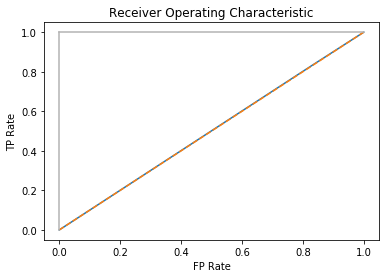

In [23]:
# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(FP_rate, TP_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

In [24]:
# Dummy model based on assuming that ALL loan are good loans! I.e., a constant value of 1:

dummy = DummyClassifier(strategy='constant', constant = 1)

dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.8274428274428275

In [25]:
# We create target probabilities for the predicted values of y:

target_probabilities = dummy.predict_proba(X_test)[:,1]

FP_rate, TP_rate, threshold = roc_curve(y_test, target_probabilities)

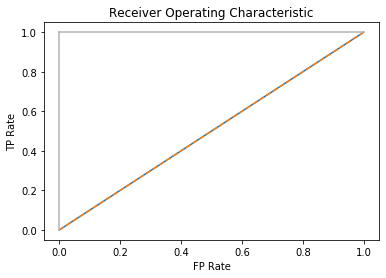

In [26]:
# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(FP_rate, TP_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

#### Logistic Regression ####

While the accuracy values of the dummy models were not that bad (the data are skewed towards loans being good, after all);  
Now we will explore Logistic Regression:

In [27]:
# Create a simple logistic regression model object and fit the training data

logit = LogisticRegression()

model = logit.fit(X_train, y_train)

In [28]:
# Accuracy score

model.score(X_test, y_test)

0.8861168861168861

In [29]:
# Make predictions for the test data set:
y_pred = model.predict(X_test)

In [30]:
# Generate a confusion matrix
matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))

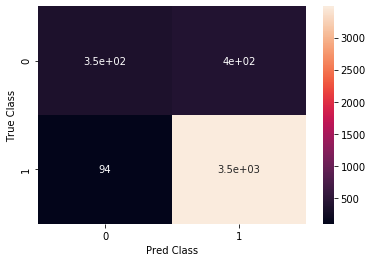

In [31]:
sns.heatmap(matrix, annot=True)
plt.ylabel('True Class'), plt.xlabel('Pred Class')
plt.show()

In [32]:
# F1 score is pretty good, but AUC is only 72% or so:

print(f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

0.933993841210336 0.7198105655452631


In [33]:
# We again create target probabilities for the predicted values of y:

target_probabilities = logit.predict_proba(X_test)[:,1]

FP_rate, TP_rate, threshold = roc_curve(y_test, target_probabilities)

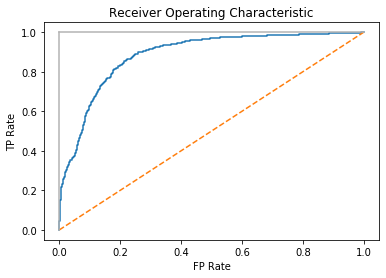

In [34]:
# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(FP_rate, TP_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

#### Random Forest Classifier ####

Next we'll explore a Random Forest classifier model to see if it can do a better job than the logistic regression:


In [35]:
# Load Random Forest library
from sklearn.ensemble import RandomForestClassifier


In [36]:
# Explore different n_estimaors, but keep the default gini criterion:

n_estimators = [50, 100, 150]

for estimators in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimators, random_state = 17, n_jobs=-1)
    rf.fit(X_train, y_train)
    print("Num of Estimators: ", estimators)
    print("Accuracy score (training): {0:.3f}".format(rf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(rf.score(X_test, y_test)))
    print()

Num of Estimators:  50
Accuracy score (training): 1.000
Accuracy score (validation): 0.936

Num of Estimators:  100
Accuracy score (training): 1.000
Accuracy score (validation): 0.936

Num of Estimators:  150
Accuracy score (training): 1.000
Accuracy score (validation): 0.937



In [37]:
# Try the same thing with the entropy criterion:

n_estimators = [50, 100, 150]

for estimators in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimators, random_state = 17, n_jobs=-1, criterion = 'entropy')
    rf.fit(X_train, y_train)
    print("Num of Estimators: ", estimators)
    print("Accuracy score (training): {0:.3f}".format(rf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(rf.score(X_test, y_test)))
    print()

Num of Estimators:  50
Accuracy score (training): 1.000
Accuracy score (validation): 0.936

Num of Estimators:  100
Accuracy score (training): 1.000
Accuracy score (validation): 0.936

Num of Estimators:  150
Accuracy score (training): 1.000
Accuracy score (validation): 0.938



In [38]:
# Use the optimal parameters:

randomforest = RandomForestClassifier(criterion = 'entropy', n_estimators=150, random_state=17, n_jobs=-1)

rfmodel = randomforest.fit(X_train, y_train)

In [39]:
y_predrf = rfmodel.predict(X_test)

In [40]:
# F1 score is pretty good, but AUC is only 71% or so:

print(f1_score(y_test, y_predrf), roc_auc_score(y_test, y_predrf))

0.962891698735569 0.8611279288006296


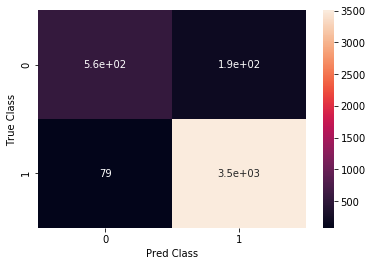

In [41]:
# Generate a confusion matrix
rfmatrix = pd.DataFrame(confusion_matrix(y_test, y_predrf))

sns.heatmap(rfmatrix, annot=True)
plt.ylabel('True Class'), plt.xlabel('Pred Class')
plt.show()

In [59]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predrf).ravel()
(tn, fp, fn, tp)

(556, 191, 79, 3503)

In [42]:
# We again create target probabilities for the predicted values of y:

rf_target_probabilities = rfmodel.predict_proba(X_test)[:,1]

FP_rate, TP_rate, threshold = roc_curve(y_test, rf_target_probabilities)

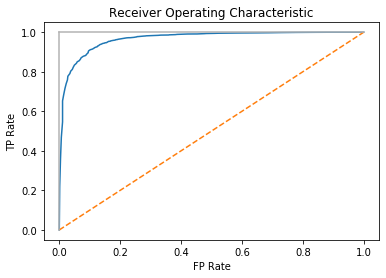

In [43]:
# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(FP_rate, TP_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

This model seems to have a signifcantly better ROC behavior than previous models. But, we don't know the relative significance, or importance, of the features in X_train and X_test. So, let's look at that next:

16


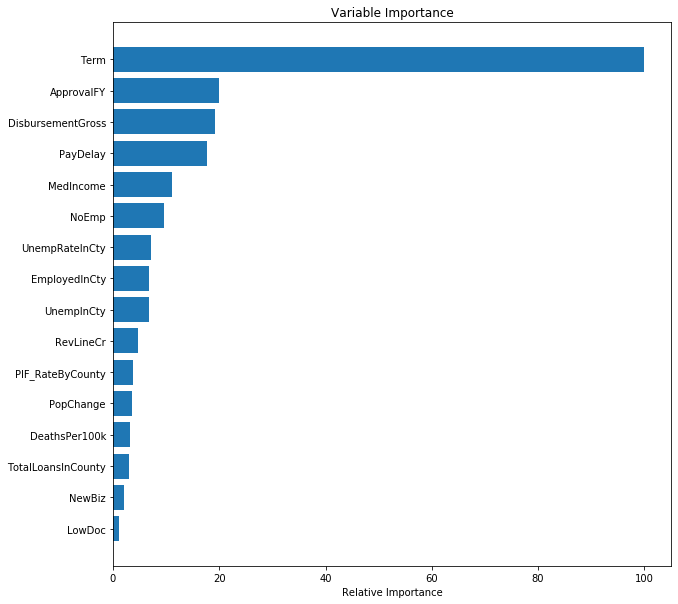

In [44]:
# obtain the feature importances from the random forest model:
feature_importance = rfmodel.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

# Plot the relative importances on a horizontal barchart:

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Gradient Boosting ###
This was a first attempt at a random forest decision tree model. Next step will be exploration of Gradient Boost approaches (for a data set this small the computational expense will be negligible). 

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=6, max_depth = 5, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.920
Accuracy score (validation): 0.914

Learning rate:  0.1
Accuracy score (training): 0.939
Accuracy score (validation): 0.931

Learning rate:  0.25
Accuracy score (training): 0.952
Accuracy score (validation): 0.933

Learning rate:  0.5
Accuracy score (training): 0.962
Accuracy score (validation): 0.940

Learning rate:  0.75
Accuracy score (training): 0.965
Accuracy score (validation): 0.930

Learning rate:  1
Accuracy score (training): 0.965
Accuracy score (validation): 0.932



In [54]:
# Fit the best model: 

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=6, max_depth = 5, random_state = 0)
gb.fit(X_train, y_train)

y_predgb = gb.predict(X_test)


In [55]:
# F1 score is pretty good, but AUC is only 71% or so:

print(f1_score(y_test, y_predgb), roc_auc_score(y_test, y_predgb))

0.9639589686720266 0.8815950569446966


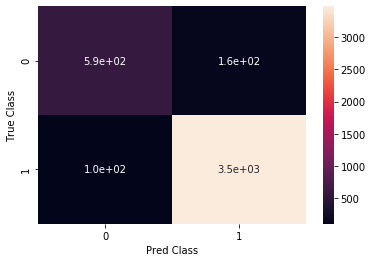

In [56]:
# Generate a confusion matrix
gbmatrix = pd.DataFrame(confusion_matrix(y_test, y_predgb))

sns.heatmap(gbmatrix, annot=True)
plt.ylabel('True Class'), plt.xlabel('Pred Class')
plt.show()

In [57]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predgb).ravel()

In [58]:
(tn, fp, fn, tp)

(592, 155, 105, 3477)

In [60]:
# We again create target probabilities for the predicted values of y:

gb_target_probabilities = gb.predict_proba(X_test)[:,1]

FP_rate, TP_rate, threshold = roc_curve(y_test, gb_target_probabilities)

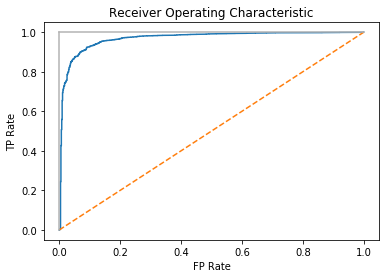

In [61]:
# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(FP_rate, TP_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

16


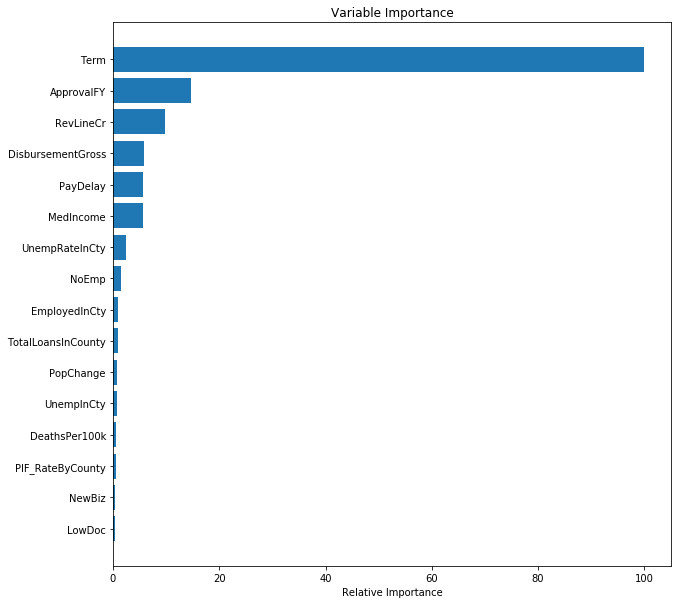

In [62]:
# obtain the feature importances from the random forest model:
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

# Plot the relative importances on a horizontal barchart:

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Examination of test set predictions### 
So far, the Gradient Boost model is doing the best at our stated goal: predicting loans with are destined for default. Out of 747 defaults in the test set, is accurately found 570 of them.  
Here we want to look at the differences in these two groups. 

In [64]:
y_test.head()

736      1.0
8674     0.0
5971     1.0
1957     1.0
11075    1.0
Name: MIS_Status, dtype: float64

In [65]:
yo = list(y_test.index)

yo = sorted(yo)

In [66]:
yo[0:5]

[0, 3, 6, 17, 19]

In [67]:
yo[-5:-1]

[19214, 19224, 19225, 19226]

In [68]:
df_test = df.iloc[yo]

In [69]:
df_test.MIS_Status.value_counts()

1.0    3582
0.0     747
Name: MIS_Status, dtype: int64

In [70]:
y_t = pd.DataFrame(y_test)

In [71]:
y_t.head()

,MIS_Status
736,1.0
8674,0.0
5971,1.0
1957,1.0
11075,1.0


In [72]:
y_bool = ((y_test-y_predgb) == 0)

In [73]:
y_bool.value_counts()

True     4069
False     260
Name: MIS_Status, dtype: int64

In [74]:
y_t['Pred'] = y_bool

In [75]:
y_t['ind'] = y_t.index

In [76]:
y_t.head(10)

,MIS_Status,Pred,ind
736,1.0,True,736
8674,0.0,False,8674
5971,1.0,True,5971
1957,1.0,True,1957
11075,1.0,True,11075
6134,1.0,True,6134
17847,1.0,True,17847
5118,0.0,False,5118
200,1.0,True,200
2298,1.0,True,2298


In [77]:
df['ind'] = df.index
testset = pd.merge(y_t, df, how='left', on ='ind')

In [78]:
testset.head(10).T

,0,1,2,3,4,5,6,7,8,9
MIS_Status_x,1,0,1,1,1,1,1,0,1,1
Pred,True,False,True,True,True,True,True,False,True,True
ind,736,8674,5971,1957,11075,6134,17847,5118,200,2298
ApprovalFY,1996,1997,2002,2008,1999,1994,1990,2008,1993,2009
Term,120,48,120,84,84,9,60,63,84,84
NoEmp,4,60,3,3,6,92,7,37,100,1
NewBiz,1,0,1,0,0,0,0,0,0,0
RevLineCr,0,0,0,1,0,0,0,1,0,1
LowDoc,1,0,1,0,0,0,0,0,0,0
DisbursementGross,45000,416000,117000,116336,150000,400000,57000,110541,80000,82157


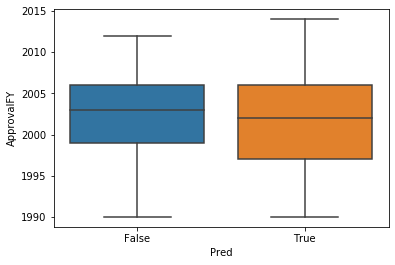

In [79]:
sns.boxplot(y='ApprovalFY', x='Pred', data=testset)

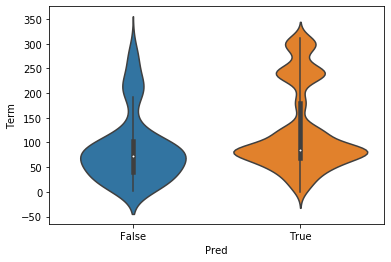

In [80]:
sns.violinplot(y='Term', x='Pred', data=testset)

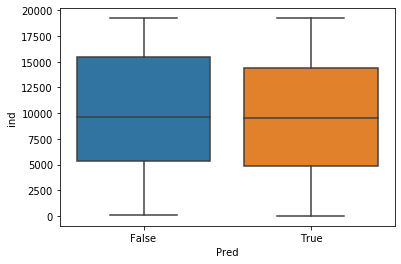

In [81]:
sns.boxplot(y='ind', x='Pred', data=testset)

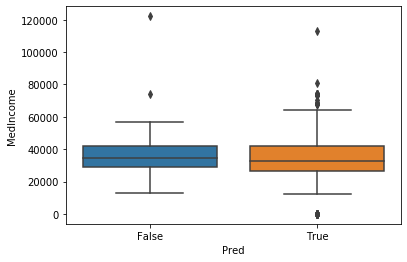

In [82]:
sns.boxplot(y='MedIncome', x='Pred', data=testset)

In [83]:
#Looking at the IQRs of the dataset grouped by accurate (True) predictions and inaccurate (False) predictions, 
# we see that inaccurate predictions tend towards shorter loan terms, shorter PayDelays, and generally larger counties
# as evidenced by Median Income, TotalLoansInCounty and UnempInCty features all being skewed higher. 

testset.groupby(by='Pred').quantile([0.25,0.75]).T

Pred                       False                        True                
                            0.25           0.75          0.25           0.75
MIS_Status_x            0.000000       1.000000      1.000000       1.000000
ind                  5299.250000   15458.250000   4843.000000   14374.000000
ApprovalFY           1999.000000    2006.000000   1997.000000    2006.000000
Term                   39.750000     102.000000     69.000000     180.000000
NoEmp                   2.000000      10.000000      2.000000      10.000000
NewBiz                  0.000000       1.000000      0.000000       0.000000
RevLineCr               0.000000       0.000000      0.000000       0.000000
LowDoc                  0.000000       0.000000      0.000000       0.000000
DisbursementGross   50675.000000  354403.750000  50000.000000  286200.000000
MIS_Status_y            0.000000       1.000000      1.000000       1.000000
TotalLoansInCounty    506.000000    2046.000000    506.000000    2046.000000
PIF_RateByCounty        0.797654       0.839232      0.797654       0.846377
MedIncome           28681.000000   41657.000000  26550.000000   41754.000000
PopChange               0.139801       0.284309      0.139801       0.276615
EmployedInCty       73288.000000  283567.000000  79175.000000  280297.000000
UnempInCty           3846.500000   13421.500000   3960.000000   13903.000000
UnempRateInCty          3.800000       5.600000      3.800000       5.700000
DeathsPer100k         551.900000     823.400000    551.900000     823.400000
PayDelay               28.750000      97.250000     31.000000     121.000000

### XGBoost Classifier ###
As a last exploration, we look at Extreme-Gradient Boosting. 

In [63]:
import xgboost as xgb

In [95]:
churn_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={"objective":"binary:logistic","max_depth":5}
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, 
                  nfold=3, num_boost_round=10, 
                  metrics="auc", as_pandas=True, seed=123)


In [96]:
print(cv_results)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.949306       0.000654       0.944459      0.004659
1        0.954064       0.000205       0.947950      0.004868
2        0.959510       0.001317       0.951400      0.004552
3        0.961264       0.001276       0.952638      0.003810
4        0.963819       0.000252       0.953945      0.003815
5        0.966807       0.001336       0.957563      0.002913
6        0.970519       0.002275       0.960259      0.005316
7        0.971853       0.001567       0.961233      0.004939
8        0.975007       0.000893       0.964351      0.002579
9        0.977731       0.001017       0.966076      0.002119


In [97]:
xgmodel = xgb.XGBClassifier(objective = 'binary:logistic',max_depth = 5, num_boost_round=10, as_pandas=True, seed=123)

In [98]:
xgmodel.fit(X_train, y_train)

[14:42:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { as_pandas, num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(as_pandas=True, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_boost_round=10, num_parallel_tree=1,
              objective='binary:logistic', random_state=123, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=123, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
y_predxg = xgmodel.predict(X_test)

In [101]:
# F1 score is pretty good, but AUC is only 71% or so:

print(f1_score(y_test, y_predxg), roc_auc_score(y_test, y_predxg))

0.969126401772117 0.8941763704735188


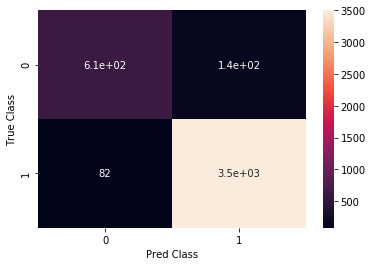

In [102]:
# Generate a confusion matrix
xgmatrix = pd.DataFrame(confusion_matrix(y_test, y_predxg))

sns.heatmap(xgmatrix, annot=True)
plt.ylabel('True Class'), plt.xlabel('Pred Class')
plt.show()

In [103]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predxg).ravel()

In [104]:
(tn, fp, fn, tp)

(606, 141, 82, 3500)

In [105]:
# We again create target probabilities for the predicted values of y:

xg_target_probabilities = xgmodel.predict_proba(X_test)[:,1]

FP_rate, TP_rate, threshold = roc_curve(y_test, xg_target_probabilities)

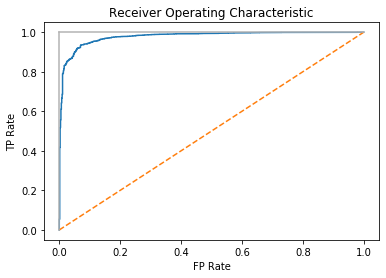

In [106]:
# Plot ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(FP_rate, TP_rate)
plt.plot([0,1], ls='--')
plt.plot([0,0],[1,0], c='.7'), plt.plot([1,1], c='.7')
plt.ylabel('TP Rate')
plt.xlabel('FP Rate')
plt.show()

16


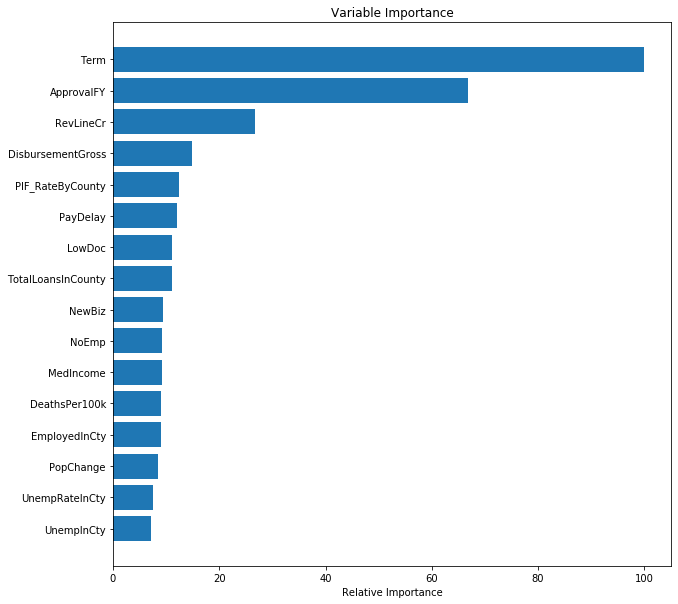

In [107]:
# obtain the feature importances from the random forest model:
feature_importance = xgmodel.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

# Plot the relative importances on a horizontal barchart:

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

So, the winner is, XGBoost! This machine learning algorithm has done the best job at monimizing both false positive and false negatives in the holdout test set. 